# **Simple Linear Regression :**
______________________________________

## **Notebook Structure**


1. [Import Libraries](#import-libraries)
2. [Data Loading](#data-loading)
3. [Splitting Training and Test Data](#splitting-training-and-test-data)
4. [Standardization of X_train and X_test](#standardization-of-x_train-and-x_test)
5. [Fitting Data in Linear Regression Model](#fitting-data-in-linear-regression-model)
6. [Loss Curve](#loss-curve)
7. [Model Metrics](#model-metrics)
8. [Visualization](#visualization)
9. [Prediction Analysis](#prediction-analysis)
10. [Sample Prediction Output](#sample-prediction-output)

## **Import Libraries**

In [173]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [174]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


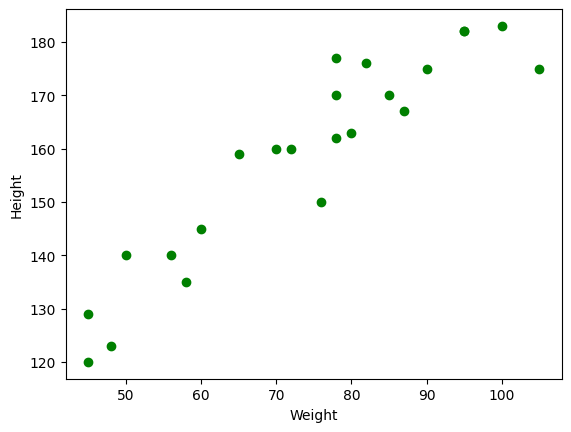

In [176]:
plt.scatter(df['Weight'], df['Height'], color='g')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

## **Splitting Training and Test Data**

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Weight']], df['Height'], test_size=0.25, random_state=42)

In [178]:
X_train.shape,X_test.shape

((17, 1), (6, 1))

## **Standardization of x_train And x_test**

In [179]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [180]:
X_test = scaler.transform(X_test)

## **Fitting Data in Linear Regression Model**

In [181]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)

## **Loss Curve**

## **Model Metrics**

In [182]:
print("The slope of the linear Regression : ", linReg.coef_)
print("The intercept of the linear Regression : ", linReg.intercept_)

The slope of the linear Regression :  [17.2982057]
The intercept of the linear Regression :  156.47058823529412


## **Visualization**

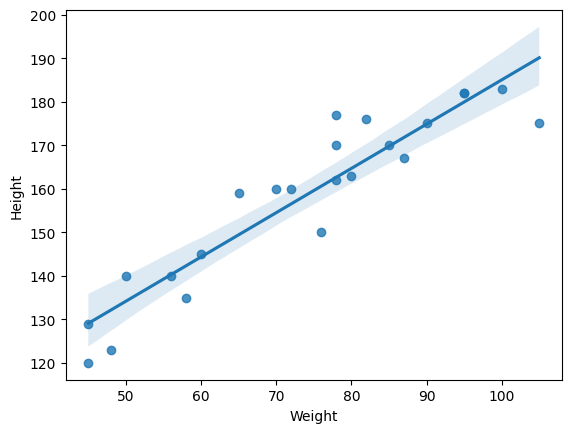

In [184]:
sns.regplot(x='Weight', y='Height', data=df)
plt.show()

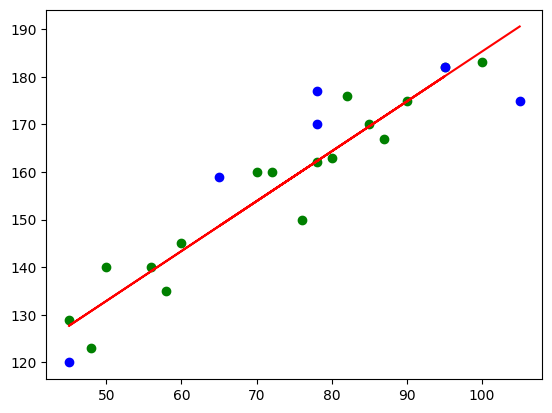

In [185]:
plt.scatter(scaler.inverse_transform(X_train), y_train, color='g')
plt.scatter(scaler.inverse_transform(X_test), y_test, color='b')
plt.plot(scaler.inverse_transform(X_test), y_pred, color='r')
plt.show()

## **Prediction Analysis**

### Prediction of Train Data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### Prediction of Test Data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

<Axes: xlabel='Weight', ylabel='Height'>

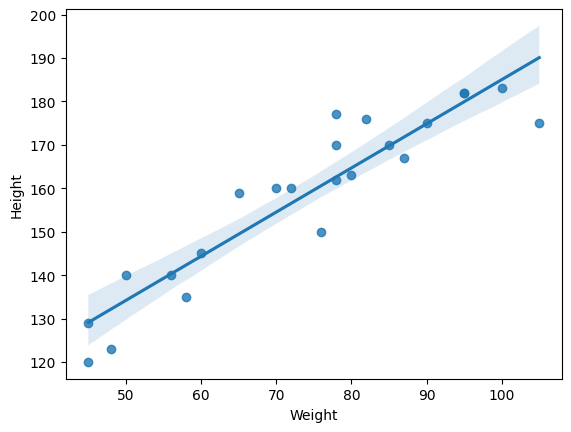

In [186]:
sns.regplot(x='Weight', y='Height', data=df)

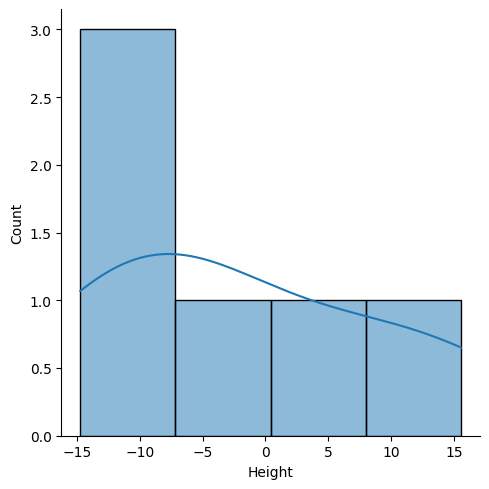

In [187]:
residuals=y_pred-y_test
sns.displot(residuals, kde=True)
plt.show()

## **Sample Prediction Output**

In [188]:
## predicted height of a person whose weight is 80 kg
print(f"Predicted Height of a 80 kg person {linReg.predict(scaler.transform([[80]]))[0]:.2f} cm")

Predicted Height of a 80 kg person 164.36 cm
